<a href="https://colab.research.google.com/github/mayenkalu/team_heroku/blob/main/Data_Cleaning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from statsmodels.tsa.seasonal import seasonal_decompose
warnings.filterwarnings('ignore')

Importing and loading the required datasets

In [ ]:
#importing and loading required datasets
fdi_inflow = pd.read_csv('https://raw.githubusercontent.com/mayenkalu/team_heroku/main/raw_datasets/fdi_inflow_data.csv', skiprows=4)
#fdi_inflow.head()

In [ ]:
gdp = pd.read_csv('https://raw.githubusercontent.com/mayenkalu/team_heroku/main/raw_datasets/gdp_data.csv', skiprows=4)
#gdp.head()

In [ ]:
migration = pd.read_csv('https://raw.githubusercontent.com/mayenkalu/team_heroku/main/raw_datasets/gdp_data.csv', skiprows= 4)
#migration.head()

In [ ]:
population = pd.read_csv('https://raw.githubusercontent.com/mayenkalu/team_heroku/main/raw_datasets/population_data.csv', skiprows = 4)
#population.head()

In [ ]:
remittances_paid = pd.read_csv('https://raw.githubusercontent.com/mayenkalu/team_heroku/main/raw_datasets/remittances_paid_data.csv', skiprows=4)
#remittances_paid.head()

In [ ]:
remittances_received = pd.read_csv('https://raw.githubusercontent.com/mayenkalu/team_heroku/main/raw_datasets/remittances_received_data.csv', skiprows=4)
#remittances_received.head()

In [ ]:
unemployment = pd.read_csv('https://raw.githubusercontent.com/mayenkalu/team_heroku/main/raw_datasets/unemployment_data.csv', skiprows = 4)
#unemployment.head()

Renaming columns and dropping columns not needed like country code, indicator name and code
  - created a list library of countries in Africa to be used to filter through the dataset to extract only African countries

In [ ]:
# renaming columns and dropping columns not needed like country code, indicator name and code
fdi_inflow = fdi_inflow.drop(columns = ['Country Code', 'Indicator Name', 'Indicator Code'], axis = 1).rename(columns = {"Country Name": "Country"})

gdp = gdp.drop(columns = ['Country Code','Indicator Name', 'Indicator Code'], axis = 1).rename(columns = {"Country Name": "Country"})

migration = migration.drop(columns = ['Country Code', 'Indicator Name', 'Indicator Code'], axis = 1).rename(columns = {"Country Name": "Country"})

population = population.drop(columns = ['Country Code', 'Indicator Name', 'Indicator Code'], axis = 1).rename(columns = {"Country Name": "Country"})

remittances_paid = remittances_paid.drop(columns = ['Country Code', 'Indicator Name', 'Indicator Code'], axis = 1).rename(columns = {"Country Name": "Country"})

remittances_received = remittances_received.drop(columns = ['Country Code', 'Indicator Name', 'Indicator Code'], axis = 1).rename(columns = {"Country Name": "Country"})

unemployment = unemployment.drop(columns = ['Country Code', 'Indicator Name', 'Indicator Code'], axis = 1).rename(columns = {"Country Name": "Country"})


In [ ]:
#list of African countries
list_of_countries = ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde',
           'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Cote d\'Ivoire',
           'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia, The', 'Ghana', 'Guinea',
           'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique',
           'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa',
           'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe']

#years with extremely large quantity of null values
years_list = ['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972',
              '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
              '1986', '1987', '1988', '1989', '1990', 'Unnamed: 67']

list_of_columns=['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde',
           'Cameroon', 'Central African Republic', 'Chad', 'Comoros','Congo, Dem. Rep.', 'Congo, Rep.', 'Cote d\'Ivoire',
           'Djibouti', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia, The', 'Ghana', 'Guinea',
           'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique',
           'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa',
           'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe']

#find missing country
list_em=[]
for x in list_of_countries:
    if x not in list_of_columns:
        list_em.append(x)

print

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from statsmodels.tsa.stattools import adfuller


In [ ]:
Date=[x for x in range(1991,2023)]

print(Date)

[1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


In [ ]:
#checking for stationarity function with ADF testing
def adf_test(data_f):

    for col in data_f.columns:
      #check stationarity of data
        result = adfuller(data_f[col])
        print(f"ADF Statistic for {col}: {result[0]}")
        print(f"P-value for {col}: {result[1]}")
        print(f"Critical Values for {col}: {result[4]}")
    
    # Check the p-value to determine stationarity
        if result[1] <= 0.05:
            print(f"{col} is stationary\n")
        else:
            print(f"{col} is non-stationary\n")
            
            sec_dec =seasonal_decompose(data_f[col], model='multiplicative', period=30)  # Adjust 'period' as needed
            sea_dec.plot()
            plt.show()
         # Perform seasonal decomposition on a specific country
         #
    span=3
    f_data_f=data_f.ffill().ewm(span=span).mean()
    b_data_f=data_f.bfill().ewm(span=span).mean()
    z_data_f=data_f.fillna(0).ewm(span=span).mean()
    bz_data_f=data_f.bfill().fillna().ewm(span=span).mean()

    return f_data_f, b_data_f, z_data_f, bz_data_f

        # Plot decomposition components
        

In [ ]:
def iter_data(df,x):
    x['Date']=Date
    for index, row in df.iterrows():
       col_name=str(row[0])
       col_val=row[1:].to_list()

       x[col_name]=col_val
    
  



In [ ]:
from datetime import datetime
date_parser=lambda x:datetime.strptime(x, "%Y-%m-%d")

In [ ]:
def summarize_data(remfill):
    bfill_remrec=remfill.ffill()
    ffill_remrec=remfill.bfill()
    zfill_remrec=remfill.fillna(0)
    plt.figure(figsize=(10, 6))
    sns.heatmap(bfill_remrec.isnull(),cbar=False, cmap='viridis')
    plt.title('Missing Values Heatmap for back fill')
    plt.show()
    sns.heatmap(ffill_remrec.isnull(),cbar=False,cmap='viridis')
    plt.title('Missing Values Heatmap for forward fill')
    plt.show()
    sns.heatmap(zfill_remrec.isnull(),cbar=False,cmap='viridis')
    plt.title('Missing Values Heatmap for zero fill')
    plt.show()


    # Descriptive Statistics
    bfill_rem_rec_stats =bfill_remrec.describe(include='all')
    ffill_rem_rec_stats =ffill_remrec.describe(include='all')
    zfill_rem_rec_stats =zfill_remrec.describe(include='all')
    
  

    

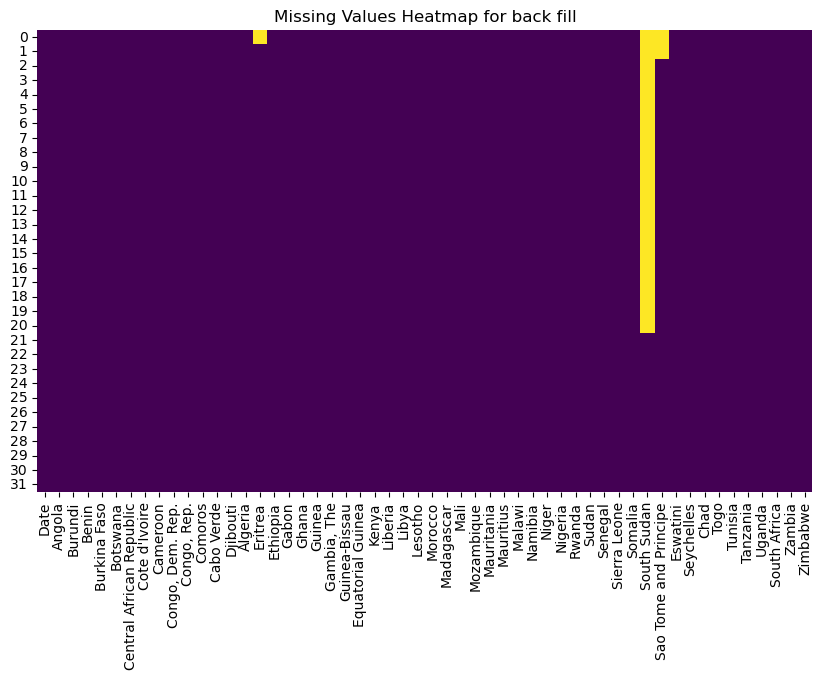

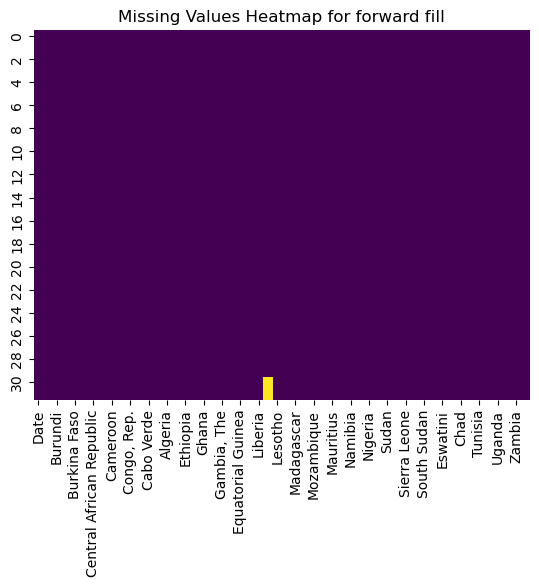

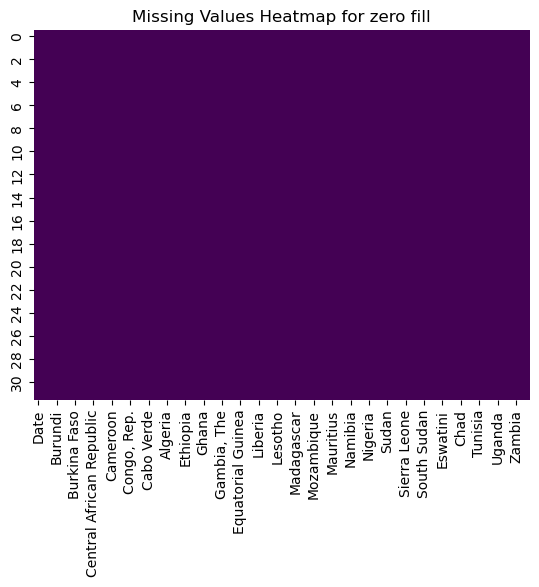

ADF Statistic for Date: -0.012544600390878029
P-value for Date: 0.9574822792195264
Critical Values for Date: {'1%': -3.7883858816542486, '5%': -3.013097747543462, '10%': -2.6463967573696143}
Date is non-stationary



ValueError: x must have 2 complete cycles requires 60 observations. x only has 32 observation(s)

In [ ]:
#filtering out African countries from the dataset and dropping columns years 1960-1990
fdi_inflow_df = fdi_inflow.query('Country in @list_of_countries')
fdi_inflow_df = fdi_inflow_df.drop(columns=years_list)
fdi_inflow_df.reset_index(drop=True, inplace=True)
fdi_inflow_df

new_fdi_inflow_df={}

iter_data(fdi_inflow_df,new_fdi_inflow_df)

new_fdi_inflow_df=pd.DataFrame(new_fdi_inflow_df)
new_fdi_inflow_df['Date']=pd.to_datetime(new_fdi_inflow_df['Date'].astype(str)+'-01-01', format="%Y-%m-%d") 

#new_fdi_inflow_df

summarize_data(new_fdi_inflow_df)




In [1]:
unemp_df = unemployment.query('Country in @list_of_countries')
unemp_df = unemp_df.drop(columns=years_list)
unemp_df.reset_index(drop=True, inplace=True)
unemp_df

new_unemp_df={}
iter_data(unemp_df,new_unemp_df)

new_unemp_df=pd.DataFrame(new_unemp_df)

new_unemp_df['Date']=pd.to_datetime(new_unemp_df['Date'].astype(str)+'-01-01', format="%Y-%m-%d")

summarize_data(new_unemp_df)

NameError: name 'unemployment' is not defined

In [ ]:
#summarize_data(unemp_df)

In [ ]:
gdp_df = gdp.query('Country in @list_of_countries')
gdp_df = gdp_df.drop(columns=years_list)
gdp_df.reset_index(drop=True, inplace=True)
#gdp_df =gdp_df.transpose()
gdp_df
new_gdp_df={}

iter_data(gdp_df,new_gdp_df)

new_gdp_df=pd.DataFrame(new_gdp_df)


new_gdp_df['Date']=pd.to_datetime(new_gdp_df['Date'].astype(str)+'-01-01', format="%Y-%m-%d")

summarize_data(new_gdp_df)

Date        Angola       Burundi         Benin  Burkina Faso  \
0   1991  7.000000e+02  2.118980e+11  5.603878e+11  8.844180e+11   
1   1992  3.800000e+03  2.256000e+11  5.944164e+11  8.884890e+11   
2   1993  2.940000e+04  2.279000e+11  6.440697e+11  9.059890e+11   
3   1994  6.781000e+05  2.337210e+11  8.872593e+11  1.052274e+12   
4   1995  1.501530e+07  2.498650e+11  1.082966e+12  1.187733e+12   
5   1996  8.354930e+08  2.631000e+11  1.207835e+12  1.323156e+12   
6   1997  1.751785e+09  3.428000e+11  1.323938e+12  1.428629e+12   
7   1998  2.555800e+09  4.002000e+11  1.448386e+12  1.654757e+12   
8   1999  1.717100e+10  4.554000e+11  2.263338e+12  2.086188e+12   
9   2000  9.166610e+10  6.273332e+11  2.499926e+12  2.108160e+12   
10  2001  1.971108e+11  7.280465e+11  2.685133e+12  2.336620e+12   
11  2002  6.653850e+11  7.682353e+11  2.909671e+12  2.512872e+12   
12  2003  1.328940e+12  8.494826e+11  3.102021e+12  2.749159e+12   
13  2004  1.967571e+12  1.007616e+12  3.264365e+12  2.874883e+12   
14  2005  3.222352e+12  1.208244e+12  3.462851e+12  3.240716e+12   
15  2006  4.209762e+12  1.309900e+12  3.674800e+12  3.420540e+12   
16  2007  5.006335e+12  1.467231e+12  3.909982e+12  3.649928e+12   
17  2008  6.643353e+12  1.911139e+12  4.365330e+12  4.215341e+12   
18  2009  5.577341e+12  2.191509e+12  4.580012e+12  4.444601e+12   
19  2010  7.701651e+12  2.501047e+12  4.718034e+12  5.002182e+12   
20  2011  1.050094e+13  2.819534e+12  5.039213e+12  5.692823e+12   
21  2012  1.222495e+13  3.365858e+12  5.688291e+12  6.413106e+12   
22  2013  1.319500e+13  3.812471e+12  6.182559e+12  6.640135e+12   
23  2014  1.432386e+13  4.184999e+12  6.559333e+12  6.884466e+12   
24  2015  1.395029e+13  4.879178e+12  6.732814e+12  6.995311e+12   
25  2016  1.654956e+13  4.897101e+12  7.005230e+12  7.605123e+12   
26  2017  2.026230e+13  5.485068e+12  7.375302e+12  8.191299e+12   
27  2018  2.562774e+13  5.414485e+12  7.922004e+12  8.826081e+12   
28  2019  3.033043e+13  5.559586e+12  8.432248e+12  9.478963e+12   
29  2020  3.170077e+13  5.910573e+12  9.008810e+12  1.032233e+13   
30  2021  4.453765e+13  6.612793e+12  9.809694e+12  1.094511e+13   
31  2022  5.337515e+13  7.336411e+12  1.085451e+13  1.177946e+13   

        Botswana  Central African Republic  Cote d'Ivoire      Cameroon  \
0   7.970750e+09              3.885670e+11   2.960043e+12  3.340200e+12   
1   8.747900e+09              3.737230e+11   2.952100e+12  3.195300e+12   
2   1.008030e+10              3.621030e+11   3.127746e+12  4.582084e+12   
3   1.143460e+10              4.725760e+11   4.615726e+12  4.942680e+12   
4   1.311420e+10              5.567450e+11   5.490706e+12  5.423134e+12   
5   1.611490e+10              5.155380e+11   9.244342e+12  5.674927e+12   
6   1.832780e+10              5.473310e+11   1.053381e+13  6.297476e+12   
7   2.024400e+10              5.706830e+11   1.157465e+13  6.665361e+12   
8   2.536140e+10              6.153774e+11   1.161885e+13  7.118458e+12   
9   2.953090e+10              6.511025e+11   1.177350e+13  7.504469e+12   
10  3.206590e+10              6.830697e+11   1.231200e+13  8.022307e+12   
11  3.441600e+10              6.909856e+11   1.252456e+13  8.614011e+12   
12  3.718158e+10              6.624258e+11   1.232384e+13  9.261145e+12   
13  4.203650e+10              6.709641e+11   1.239802e+13  9.927779e+12   
14  5.075207e+10              7.054160e+11   1.267367e+13  1.028673e+13   
15  5.783167e+10              7.637130e+11   1.320766e+13  1.092419e+13   
16  6.487036e+10              8.135870e+11   1.376555e+13  1.145287e+13   
17  7.325785e+10              8.890600e+11   1.519890e+13  1.236095e+13   
18  7.239901e+10              9.722760e+11   1.593675e+13  1.313669e+13   
19  8.585290e+10              1.060142e+12   1.728628e+13  1.361055e+13   
20  1.033301e+11              1.148896e+12   1.729186e+13  1.443477e+13   
21  1.062603e+11              1.281561e+12   1.853437e+13  1.539586e+13   
22  1.198670e+11              8.35

In [ ]:
#summarize_data(gdp_df)

In [ ]:
migration_df = migration.query('Country in @list_of_countries')
migration_df = migration_df.drop(columns=years_list)
migration_df.reset_index(drop=True, inplace=True)
migration_df

new_migration_df={}

iter_data(migration_df,new_migration_df)

new_migration_df=pd.DataFrame(new_migration_df)


new_migration_df['Date']=pd.to_datetime(new_migration_df['Date'].astype(str)+'-01-01', format="%Y-%m-%d")

summarize_data(new_migration_df)

In [ ]:
#summarize_data(migration_df)

In [ ]:
population_df = population.query('Country in @list_of_countries')
population_df = population_df.drop(columns=years_list)
population_df.reset_index(drop=True, inplace=True)
population_df

new_pop_df={}

iter_data(population_df,new_pop_df)

new_pop_df=pd.DataFrame(new_pop_df)

new_pop_df['Date']=pd.to_datetime(new_pop_df['Date'].astype(str)+'-01-01', format="%Y-%m-%d")

summarize_data(new_pop_df)

In [ ]:
remittances_paid_df = remittances_paid.query('Country in @list_of_countries')
remittances_paid_df = remittances_paid_df.drop(columns=years_list)
remittances_paid_df.reset_index(drop=True, inplace=True)
remittances_paid_df

new_rem_paid_df={}

iter_data(remittances_paid_df,new_rem_paid_df)

new_rem_paid_df=pd.DataFrame(new_rem_paid_df)

new_rem_paid_df['Date']=pd.to_datetime(new_rem_paid_df['Date'].astype(str)+'-01-01', format="%Y-%m-%d")

summarize_data(new_rem_paid_df)

In [ ]:
#summarize_data(remittances_paid_df)

In [ ]:
remittances_received_df = remittances_received.query('Country in @list_of_countries')
remittances_received_df = remittances_received_df.drop(columns=years_list)
remittances_received_df.reset_index(drop=True, inplace=True)
remittances_received_df

new_rem_rec_df={}

iter_data(remittances_received_df,new_rem_rec_df)

new_rem_rec_df=pd.DataFrame(new_rem_rec_df)

new_rem_rec_df['Date']=pd.to_datetime(new_rem_rec_df['Date'].astype(str)+'-01-01', format="%Y-%m-%d")

summarize_data(new_rem_rec_df)

In [ ]:
#data for modelling


Remittance Received

In [ ]:
def plot_graph(data_df, c):
   

   data_df= data_df.pivot(index='Date', columns='African Country', values='Value')
#c is the form of fill
# Rename the colum

   f_data=data_df.ffill() #forward fill
   b_data=data_df.bfill() #back fill
   z_data=data_df.fillna(0) #zero fill
   bz_data=data_df.bfill().fillna(0) #back fill because it was effective in filling nan values and zero fill for other empty rows as shown on heat map
    # Plotting time series line graph
   plt.figure(figsize=(12, 6))
   sns.lineplot(x='Date', y='African Country', data=f_data, label='on forward fill')
   sns.lineplot(x='Date', y='African Country', data=b_data, label='on back fill')
   sns.lineplot(x='Date', y='African Country', data=z_data, label='on zero fill')
   sns.lineplot(x='Date', y='African Country', data=bz_data, label='on zero fill')

   plt.title('time series visuals for: ', c)
   plt.xlabel('Date')
   plt.ylabel(c)
   plt.legend()
   plt.show()


   plt.figure(figsize=(12, 6))
   f_data.plot(figsize=(12, 6), linewidth=2)
   plt.title('Time Series Line Graph with NaN replaced with forward fill for ', c)
   plt.xlabel('Date')
   plt.ylabel('Values')
   plt.legend(loc='upper left')
   plt.show()

   plt.figure(figsize=(12, 6))
   b_data.plot(figsize=(12, 6), linewidth=2)
   plt.title('Time Series Line Graph with NaN replaced with back fill for ', c)
   plt.xlabel('Date')
   plt.ylabel('Values')
   plt.legend(loc='upper left')
   plt.show()

   plt.figure(figsize=(12, 6))
   z_data.plot(figsize=(12, 6), linewidth=2)
   plt.title('Time Series Line Graph with NaN replaced with zero fill for ',c)
   plt.xlabel('Date')
   plt.ylabel('Values')
   plt.legend(loc='upper left')
   plt.show()

   plt.figure(figsize=(12, 6))
   bz_data.plot(figsize=(12, 6), linewidth=2)

   plt.title('time series visuals for: ', c)
   plt.xlabel('Date')
   plt.ylabel(c)
   plt.legend()
   plt.show()
    

In [ ]:
#remittance paid rolled for more stationarity

rolled_fw_rem_paid, rolled_bw_rem_paid, rolled_zr_rem_paid, rolled_bz_rem_paid=adf_test(new_rem_paid_df)


In [ ]:
#remittance paid rolled
rolled_fw_rem_rec, rolled_bw_rem_rec, rolled_zr_rem_rec, rolled_bz_rem_rec=adf_test(new_rem_rec_df)




In [ ]:
#population rolled
rolled_fw_pop, rolled_bw_pop, rolled_zr_pop, rolled_bz_pop=adf_test(new_pop_df)
#data rolling for forward, back, zero and back and zero filled data

In [ ]:
rolled_fw_fdi, rolled_bw_fdi, rolled_zr_fdi, rolled_bz_fdi=adf_test(new_fdi_inflow_df)


In [ ]:
rolled_fw_gdp, rolled_bw_gdp, rolled_zr_gdp, rolled_bz_gdp=adf_test(new_gdp_df)


In [ ]:
rolled_fw_unemp, rolled_bw_unemp, rolled_zr_unemp, rolled_bz_unemp=adf_test(new_unemp_df)


In [ ]:
rolled_fw_mig, rolled_bw_mig, rolled_zr_mig, rolled_bz_mig=adf_test(new_migration_df)


In [ ]:
#all data has been
#plot graph of gdp
plot_graph(new_gdp_df)

#plot graph of population
plot_graph(new_pop_df)

#plot graph of migration
plot_graph(new_migration_df)

#plot graph of fdi inflow
plot_graph(new_fdi_inflow_df)

#plot graph of remittance paid
plot_graph(new_rem_paid_df)

#plot graph of remittance recieved
plot_graph(new_rem_rec_df)

#plot graph of unemployment
plot_graph(new_unemp_df)

'#plot graph of gdp\nplot_graph(gdp_df)\n\n#plot graph of population\nplot_graph(population_df)\n\n#plot graph of migration\nplot_graph(migration_df)\n\n#plot graph of fdi inflow\nplot_graph(fdi_inflow_df)\n\n#plot graph of remittance paid\nplot_graph(remittances_paid_df)\n\n#plot graph of remittance recieved\nplot_graph(remittances_received_df)\n\n#plot graph of unemployment\nplot_graph(unemp_df) '

In [ ]:
rolled_list=[rolled_fw_rem_paid, rolled_bw_rem_paid, rolled_zr_rem_paid, rolled_bz_rem_paid,rolled_fw_rem_rec, rolled_bw_rem_rec, rolled_zr_rem_rec, rolled_bz_rem_rec,rolled_fw_pop, rolled_bw_pop, rolled_zr_pop, rolled_bz_pop,rolled_fw_fdi, rolled_bw_fdi, rolled_zr_fdi, rolled_bz_fdi,rolled_fw_gdp, rolled_bw_gdp, rolled_zr_gdp, rolled_bz_gdp,rolled_fw_unemp, rolled_bw_unemp, rolled_zr_unemp, rolled_bz_unemp,rolled_fw_mig, rolled_bw_mig, rolled_zr_mig, rolled_bz_mig]

In [ ]:
correlation_matrix={}

for i, iroll in enumerate(rolled_list):
    for j, jroll in enumerate(rolled_list):
        if i !=j: #to remove self correlation which  equates to 1
            key= f"{i+1}_to_{j+1}"
            corr_matrix=iroll.corrwith(jroll)
            correlation_matrix[key]=corr_matrix


for key,corr_matrix in correlation_matrix:
    print(f"correlation between rolled_list{key}:")
    print(correlation_matrix)


In [ ]:
#model for forecasting
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from fbprophet import Prophet

scale=MinMaxScaler()

df=pd.merge(rolled_bz_fdi,rolled_bz_gdp, on='Date')
df=pd.merge(df,rolled_bz_mig, on='Date')
df=pd.merge(df,rolled_bz_pop, on='Date')
df=pd.merge(df,rolled_bz_rem_rec, on="Date")
final_df=pd.merge(df,rolled_bz_unemp, on='Date')

remit =f'{Country}_remittance_value'

data_f_remit=final_df[['date',f'{Country}_rolled_bz_fdi',f'{Country}_rolled_bz_gdp','rolled_bz_pop','rolled_bz_rem_red','rolled_bz_unemp',remit]]
data_f_remit=data_f_remit.rename(columns={'Date':'x (trend_time)',remit:'y (remittance in $)'})

model=Prophet()

model.fit(data_f_remit)

future_df=model.make_future_dataframe(periods=365)

remit_forecast=model.predict(future_df)

plot_remit=model.plot(remit_forecast)


In [ ]:
#select best arima model
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from itertools import product

# Assuming you have a time series named 'ts'
# Replace with your actual time series data

# Define the range of p, d, q values
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)

# Generate all possible combinations of p, d, q
pdq_combinations = list(product(p_values, d_values, q_values))

best_aic = float('inf')
best_order = None
best_model = None

# Iterate over all combinations
for order in pdq_combinations:
    try:
        model = ARIMA(final_df, order=order)
        results = model.fit()
        aic = results.aic
        if aic < best_aic:
            best_aic = aic
            best_order = order
            best_model = results
    except:
        continue

print(f"Best ARIMA Model Order: {best_order}")
print(f"AIC: {best_aic}")

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming you have a seasonal time series named 'ts' and the best ARIMA order from the previous step
# Replace with your actual time series data

# Define the seasonal order
seasonal_order = (0, 0, 0, 0)  # Replace with your actual values

# Train SARIMA model
sarima_model = SARIMAX(final_df, order=best_order, seasonal_order=seasonal_order)
sarima_results = sarima_model.fit()


In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from fbprophet import Prophet
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Assuming you have a time series named 'ts'
# Replace with your actual time series data

# SARIMA
sarima_order = (p, d, q, P, D, Q, s)  # Replace with your actual values
sarima_model = SARIMAX(ts, order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_results = sarima_model.fit()
sarima_predictions = sarima_results.get_forecast(len(final_df)).predicted_mean
sarima_mse = mean_squared_error(final_df, sarima_predictions)
sarima_rmse = sqrt(sarima_mse)

# Prophet
df_prophet = pd.DataFrame({'ds': final_df.index, 'y': ts.values})
prophet_model = Prophet()
prophet_model.fit(df_prophet)
future_prophet = prophet_model.make_future_dataframe(periods=len(ts))
forecast_prophet = prophet_model.predict(future_prophet)
prophet_rmse = sqrt(mean_squared_error(final_df, forecast_prophet['yhat']))

# ARIMA with AIC
# You should have already selected the best ARIMA order using AIC in the previous step
arima_model = ARIMA(final_df, order=best_order)
arima_results = arima_model.fit()
arima_predictions = arima_results.predict()
arima_mse = mean_squared_error(final_df, arima_predictions)
arima_rmse = sqrt(arima_mse)

# Compare RMSE values
print(f"SARIMA RMSE: {sarima_rmse}")
print(f"Prophet RMSE: {prophet_rmse}")
print(f"ARIMA RMSE: {arima_rmse}")

# Choose the model with the lowest RMSE
best_model = min(sarima_rmse, prophet_rmse, arima_rmse)
if best_model == sarima_rmse:
    print("SARIMA is the best model.")
elif best_model == prophet_rmse:
    print("Prophet is the best model.")
else:
    print("ARIMA is the best model.")